In [2]:
import numpy as np
import librosa
import soundfile
import os, glob, pickle
from sklearn.model_selection import train_test_split
from tqdm import tqdm

In [106]:
CLASSES = ['Exclamation', 'Question', 'Statement']
PATH_TRAIN = 'C:\\Users\\Sveta\\PycharmProjects\\Course project\\Russian'

In [43]:
def extract_feature(file_name, mfcc, chroma, mel):
    X, sample_rate = librosa.load(file_name, res_type='kaiser_fast')    
    if chroma:
        stft=np.abs(librosa.stft(X))
    result=np.array([])
    if mfcc:
        mfccs=np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40).T, axis=0)
        result=np.hstack((result, mfccs))
    if chroma:
        chroma=np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T,axis=0)
        result=np.hstack((result, chroma))
    if mel:
        mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
        result=np.hstack((result, mel))
    return result

In [44]:
def get_data(path):
    X = []
    y = []
    count = 0
    for int_class in CLASSES:
        class_path = os.path.join(path, int_class)
        #print(int_class)
        for filename in tqdm(os.listdir(class_path)):
            if not '.wav' in filename:
                continue
            filepath = glob.glob(os.path.join(class_path, filename))[0]
            feature_vector = extract_feature(filepath, mfcc=True, chroma=True, mel=True)
            X.append(feature_vector)
            y.append(int_class)
            count += 1
    print('Set from ' + path + ' uploaded. \nFiles ' + str(count))
    return X, y

In [107]:
X, y = get_data(PATH_TRAIN)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

100%|██████████████████████████████████████████████████████████████████████████████████| 83/83 [00:05<00:00, 16.01it/s]

Set from C:\Users\Sveta\PycharmProjects\Course project\Russian uploaded. 
Files 229


In [382]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, validation_curve, learning_curve
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet

In [46]:
accu = []
prec = []
rec = []
f1 = []

In [47]:
from sklearn import metrics

def model_report(model, X_test, y_test):
    y_pred = model.predict(X_test)
    print(metrics.classification_report(y_test, y_pred))
    #return metrics.accuracy_score(y_test, y_pred)

## DecisionTreeClassifier

In [48]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(
    #criterion='gini',
    max_depth=4,
    min_samples_split=6,
    min_samples_leaf=1,
    max_features=None,
    random_state=42
 )

In [49]:
tree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=42, splitter='best')

In [50]:
model_report(tree, X_test, y_test)

              precision    recall  f1-score   support

 Exclamation       0.29      0.55      0.37        11
    Question       0.50      0.29      0.37        17
   Statement       0.87      0.72      0.79        18

    accuracy                           0.52        46
   macro avg       0.55      0.52      0.51        46
weighted avg       0.59      0.52      0.53        46



In [14]:
y_pred2=tree.predict(X_test)

In [51]:
#accu.append(metrics.accuracy_score(y_test, y_pred2))

In [16]:
from sklearn.model_selection import cross_val_score

#scores = cross_val_score(log_clf, X, y, cv=5)
#scores

## RandomForestClassifier

In [88]:
from sklearn.ensemble import RandomForestClassifier


rf = RandomForestClassifier(
    criterion='gini',
    n_estimators=100,
    max_depth=6,
    min_samples_split=5,
    min_samples_leaf=1,
    max_features=None,
    random_state=42)

In [89]:
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)


In [90]:
model_report(rf, X_test, y_test)

              precision    recall  f1-score   support

 Exclamation       0.43      0.82      0.56        11
    Question       0.77      0.59      0.67        17
   Statement       0.92      0.61      0.73        18

    accuracy                           0.65        46
   macro avg       0.70      0.67      0.65        46
weighted avg       0.75      0.65      0.67        46



In [395]:
y, sr = librosa.load(librosa.util.example_audio_file())
pitches, magnitudes = librosa.piptrack(y=X[0], sr=1000)

## LogisticRegression

In [127]:
from sklearn.linear_model import LogisticRegression

log_clf = LogisticRegression(multi_class="multinomial", solver="newton-cg", random_state=42, n_jobs=-1)

In [128]:
log_clf.fit(X_train, y_train)
y_pred_lr = log_clf.predict(X_test)

In [129]:
model_report(log_clf, X_test, y_test)

              precision    recall  f1-score   support

 Exclamation       0.88      0.64      0.74        11
    Question       0.67      0.59      0.62        17
   Statement       0.70      0.89      0.78        18

    accuracy                           0.72        46
   macro avg       0.75      0.70      0.71        46
weighted avg       0.73      0.72      0.71        46



In [399]:
accu.append(metrics.accuracy_score(y_test, y_pred_lr))

## Knn 

In [118]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train, y_train)

model_report(knn, X_test, y_test)

              precision    recall  f1-score   support

 Exclamation       0.40      0.55      0.46        11
    Question       0.53      0.47      0.50        17
   Statement       0.75      0.67      0.71        18

    accuracy                           0.57        46
   macro avg       0.56      0.56      0.56        46
weighted avg       0.59      0.57      0.57        46



## RidgeClassifier

In [99]:
from sklearn.linear_model import RidgeClassifier



ridge = RidgeClassifier(alpha=0.01, solver="sag")
ridge.fit(X_train, y_train)
y_pred_r = ridge.predict(X_test)
model_report(ridge, X_test, y_test)

              precision    recall  f1-score   support

 Exclamation       0.67      0.73      0.70        11
    Question       0.73      0.65      0.69        17
   Statement       0.84      0.89      0.86        18

    accuracy                           0.76        46
   macro avg       0.75      0.75      0.75        46
weighted avg       0.76      0.76      0.76        46



In [101]:
import pickle
# save the classifier
with open('ridge.pkl', 'wb') as fid:
    pickle.dump(ridge, fid)    

# load it again
with open('ridge.pkl', 'rb') as fid:
    model = pickle.load(fid)



In [102]:
feature_vector = extract_feature('- Разве это Ната+ша^.wav', mfcc=True, chroma=True, mel=True)
model.predict(feature_vector.reshape(1, -1)).item(0)

'Question'

In [103]:
res = model.predict(X_test)
model_report(model, X_test, y_test)

              precision    recall  f1-score   support

 Exclamation       0.67      0.73      0.70        11
    Question       0.73      0.65      0.69        17
   Statement       0.84      0.89      0.86        18

    accuracy                           0.76        46
   macro avg       0.75      0.75      0.75        46
weighted avg       0.76      0.76      0.76        46



## SVM

In [130]:
from sklearn.svm import LinearSVC

svm = LinearSVC(penalty="l2", dual=False, tol=1e-3)
svm.fit(X_train, y_train)
y_pred_svm= svm.predict(X_test)
model_report(svm, X_test, y_test)

              precision    recall  f1-score   support

 Exclamation       0.88      0.64      0.74        11
    Question       0.69      0.65      0.67        17
   Statement       0.73      0.89      0.80        18

    accuracy                           0.74        46
   macro avg       0.76      0.72      0.73        46
weighted avg       0.75      0.74      0.74        46



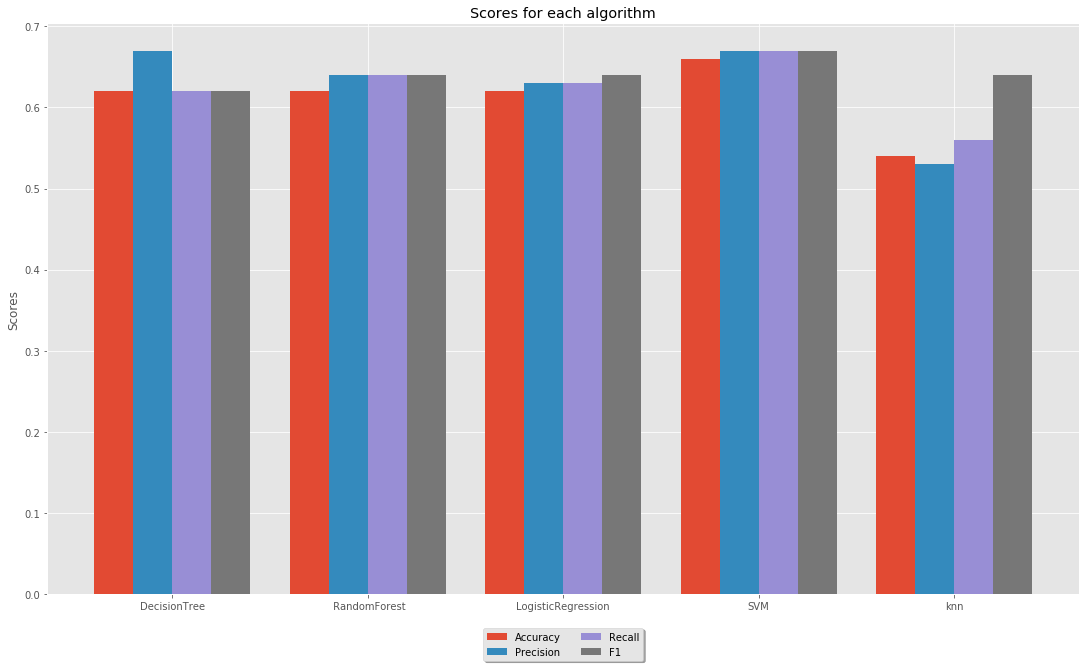

In [84]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
N = 5

ind = np.arange(N)
width = 0.2
fig, ax = plt.subplots()
fig.set_size_inches(18.5, 10.5)

accu = [0.62, 0.62, 0.62, 0.66, 0.54]
rects1 = ax.bar(ind, accu, width)
prec = [0.67, 0.64, 0.63, 0.67, 0.53]
rects2 = ax.bar(ind+width, prec, width)
rec = [0.62, 0.64, 0.63, 0.67, 0.56]
rects3 = ax.bar(ind + 2 * width, rec, width)
f1 = [0.62, 0.64, 0.64, 0.67, 0.64]

rects4 = ax.bar(ind + 3 * width, f1, width)

ax.set_ylabel('Scores')
ax.set_title('Scores for each algorithm')
ax.set_xticks(ind + 1.5*width)
ax.set_xticklabels(('DecisionTree', ' RandomForest', 'LogisticRegression', 'SVM', 'knn'))
ax.legend((rects1[0], rects2[0], rects3[0], rects4[0]), ('Accuracy', 'Precision', 'Recall', 'F1'),
          loc='upper center', bbox_to_anchor=(0.5, -0.05), shadow=True, ncol=2)

plt.show()